<a href="https://colab.research.google.com/github/SAR2652/BBC-News-Text-Summarization/blob/main/BBC_News_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BBC News Text Summarization

## Prepare Environment for Development

### Mount Google Drive to import JSON credentials file from Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/kaggle.json ~/.kaggle/kaggle.json

### Download and Extract the Data Set

In [4]:
!kaggle datasets download -d pariza/bbc-news-summary

 56% 5.00M/8.91M [00:00<00:00, 31.2MB/s]
100% 8.91M/8.91M [00:00<00:00, 43.6MB/s]


In [5]:
!unzip -o bbc-news-summary.zip

Streaming output truncated to the last 5000 lines.
  inflating: BBC News Summary/Summaries/sport/363.txt  
  inflating: BBC News Summary/Summaries/sport/364.txt  
  inflating: BBC News Summary/Summaries/sport/365.txt  
  inflating: BBC News Summary/Summaries/sport/366.txt  
  inflating: BBC News Summary/Summaries/sport/367.txt  
  inflating: BBC News Summary/Summaries/sport/368.txt  
  inflating: BBC News Summary/Summaries/sport/369.txt  
  inflating: BBC News Summary/Summaries/sport/370.txt  
  inflating: BBC News Summary/Summaries/sport/371.txt  
  inflating: BBC News Summary/Summaries/sport/372.txt  
  inflating: BBC News Summary/Summaries/sport/373.txt  
  inflating: BBC News Summary/Summaries/sport/374.txt  
  inflating: BBC News Summary/Summaries/sport/375.txt  
  inflating: BBC News Summary/Summaries/sport/376.txt  
  inflating: BBC News Summary/Summaries/sport/377.txt  
  inflating: BBC News Summary/Summaries/sport/378.txt  
  inflating: BBC News Summary/Summaries/sport/379.txt

### Check the content of files

In [6]:
!ls -a 'BBC News Summary'

 .   ..  'News Articles'   Summaries


In [7]:
!ls -a BBC\ News\ Summary/News\ Articles

.  ..  business  entertainment	politics  sport  tech


In [8]:
!ls -a BBC\ News\ Summary/Summaries

.  ..  business  entertainment	politics  sport  tech


In [9]:
!ls -a BBC\ News\ Summary/News\ Articles/business

.	 056.txt  113.txt  170.txt  227.txt  284.txt  341.txt  398.txt	455.txt
..	 057.txt  114.txt  171.txt  228.txt  285.txt  342.txt  399.txt	456.txt
001.txt  058.txt  115.txt  172.txt  229.txt  286.txt  343.txt  400.txt	457.txt
002.txt  059.txt  116.txt  173.txt  230.txt  287.txt  344.txt  401.txt	458.txt
003.txt  060.txt  117.txt  174.txt  231.txt  288.txt  345.txt  402.txt	459.txt
004.txt  061.txt  118.txt  175.txt  232.txt  289.txt  346.txt  403.txt	460.txt
005.txt  062.txt  119.txt  176.txt  233.txt  290.txt  347.txt  404.txt	461.txt
006.txt  063.txt  120.txt  177.txt  234.txt  291.txt  348.txt  405.txt	462.txt
007.txt  064.txt  121.txt  178.txt  235.txt  292.txt  349.txt  406.txt	463.txt
008.txt  065.txt  122.txt  179.txt  236.txt  293.txt  350.txt  407.txt	464.txt
009.txt  066.txt  123.txt  180.txt  237.txt  294.txt  351.txt  408.txt	465.txt
010.txt  067.txt  124.txt  181.txt  238.txt  295.txt  352.txt  409.txt	466.txt
011.txt  068.txt  125.txt  182.txt  239.txt  296.txt  353.txt  

In [10]:
!cat BBC\ News\ Summary/News\ Articles/business/001.txt

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL

In [11]:
!cat BBC\ News\ Summary/Summaries/business/001.txt

TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.Time Warner's fourth quarter profits were slightly better than analysts' expectations.

## Extractive Text Summarization

### Import Necessary Libraries

In [12]:
import re, heapq, nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Function for Extractive Summarization

In [13]:
def extractive_summarize(text):
    # Tokenization
    sentences = nltk.sent_tokenize(text)
    
    # Text preprocessing
    text = re.sub(r'\[[0-9]*\]', ' ', text) # remove numeric citations
    text = re.sub(r'\s+', ' ', text) # remove 1+ continuous whitespaces
    clean_text = text.lower() # convert all text to lower case
    clean_text = re.sub(r'\W', ' ', clean_text) # remove non-word characters
    clean_text = re.sub(r'\d', ' ', clean_text) # remove any digits
    clean_text = re.sub(r'\s+', ' ', clean_text) # remove 1+ continuous whitespaces

    # Generate dictionary of word frequencies while deleting stopwords
    stop_words = stopwords.words('english')
    word2count = {}
    for word in nltk.word_tokenize(clean_text):
        if word not in stop_words:
            if word not in word2count.keys(): # create new key as word
                word2count[word] = 1
            else:
                word2count[word] += 1

    # standardize all values
    for key in word2count.keys():
        word2count[key] = word2count[key] / max(word2count.values())

    # Generate information
    sent2score = {}
    for sentence in sentences:
        for word in nltk.word_tokenize(sentence.lower()):
            if word in word2count.keys():
                if len(sentence.split(' ')) < 30:   # sentence length condition
                    if sentence not in sent2score.keys():
                        sent2score[sentence] = word2count[word]
                    else:
                        sent2score[sentence] += word2count[word]

    # Select best sentences
    best_sentences = heapq.nlargest(5, sent2score, key = sent2score.get)
    print('----------------------------------------------------------------------------')
    for sentence in best_sentences:
        print(sentence)

### Test for Extractive Summarization

In [14]:
f = open('BBC News Summary/News Articles/business/001.txt')
extractive_summarize(f.read())

----------------------------------------------------------------------------
It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.
It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband.
However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.
TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.
For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.


## Abstractive Summarization

In [15]:
!pip install tensorflow-gpu tqdm

     |████████████████████████████████| 320.4MB 51kB/s 


### Import the remaining libraries

In [117]:
import os, string
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk import wordpunct_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Attention, LSTM, TimeDistributed

### Initialize File Path and Load Data into a DataFrame 

In [17]:
base_path = 'BBC News Summary'
news_article_path = os.path.join(base_path, 'News Articles')
summary_path = os.path.join(base_path, 'Summaries')
topics = os.listdir(news_article_path)

In [18]:
train_df_list = []
validation_df_list = []
for topic in topics:
    topic_articles_path = os.path.join(news_article_path, topic)
    topic_summaries_path = os.path.join(summary_path, topic)

    # Read all files from each topic in a sorted order
    articles = [open(os.path.join(topic_articles_path, x), encoding = 'unicode_escape').read() for x in sorted(os.listdir(topic_articles_path))]
    summaries = [open(os.path.join(topic_summaries_path, x), encoding = 'unicode_escape').read() for x in sorted(os.listdir(topic_summaries_path))]
                                                                                                  
    # Split data into training and validation sets using random sampling
    train_articles, validation_articles, train_summaries, validation_summaries = train_test_split(articles, summaries,
                                                                                                  test_size = 0.225, random_state = 42)
    
    train_df = pd.DataFrame()
    train_df['Article'] = np.array(train_articles).T
    train_df['Summary'] = np.array(train_summaries).T
    val_df = pd.DataFrame()
    val_df['Article'] = np.array(validation_articles).T
    val_df['Summary'] = np.array(validation_summaries).T
    train_df_list.append(train_df)
    validation_df_list.append(val_df)

In [106]:
df_train = pd.concat(train_df_list)
df_train.head()

,Article,Summary
0,Can Yahoo dominate next decade?\n\nYahoo has r...,Both began life as search engines although in ...
1,"Argonaut founder rebuilds empire\n\nJez San, t...","Jez San, the man behind the Argonaut games gro..."
2,Hitachi unveils 'fastest robot'\n\nJapanese el...,Japanese electronics firm Hitachi has unveiled...
3,Mobiles double up as bus tickets\n\nMobiles co...,The system would reduce queues and make travel...
4,Humanoid robot learns how to run\n\nCar-maker ...,Asimo has already made his mark on the interna...


In [107]:
df_val = pd.concat(validation_df_list)
df_val.head()

,Article,Summary
0,Peer-to-peer nets 'here to stay'\n\nPeer-to-pe...,But they have slowly realised that P2P is a go...
1,Dublin hi-tech labs to shut down\n\nDublin's h...,"In a statement, Media Labs Europe said the dec..."
2,UK gets official virus alert site\n\nA rapid a...,A rapid alerting service that tells home compu...
3,"Lifestyle 'governs mobile choice'\n\nFaster, b...",Dr Bjorn said that people also used their came...
4,What high-definition will do to DVDs\n\nFirst ...,"But currently, putting a master feature film o..."


In [108]:
df_train.shape

(1723, 2)

In [109]:
df_val.shape

(502, 2)

### Exploratory Data Analysis

In [111]:
full_df = pd.concat([df_train, df_val])
full_df.head()

,Article,Summary
0,Can Yahoo dominate next decade?\n\nYahoo has r...,Both began life as search engines although in ...
1,"Argonaut founder rebuilds empire\n\nJez San, t...","Jez San, the man behind the Argonaut games gro..."
2,Hitachi unveils 'fastest robot'\n\nJapanese el...,Japanese electronics firm Hitachi has unveiled...
3,Mobiles double up as bus tickets\n\nMobiles co...,The system would reduce queues and make travel...
4,Humanoid robot learns how to run\n\nCar-maker ...,Asimo has already made his mark on the interna...


In [114]:
def length(x):
    return len(wordpunct_tokenize(x))

In [115]:
full_df['Article_Length'] = full_df['Article'].apply(length)
full_df['Summary_Length'] = full_df['Summary'].apply(length)

#### Examine the distribution of lengths together

##### Combined Distribution Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


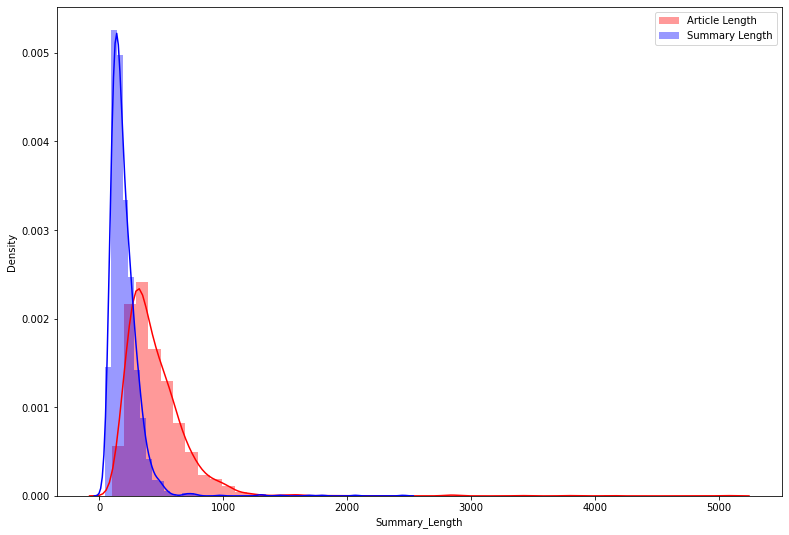

In [121]:
plt.figure(figsize = (13, 9))
sns.distplot(full_df['Article_Length'], color = 'red', label = 'Article Length')
sns.distplot(full_df['Summary_Length'], color = 'blue', label = 'Summary Length')
plt.legend()

#### Examine the distribution of lengths separately

##### Distribution Plot for Article Length as well as Statistical Measures

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


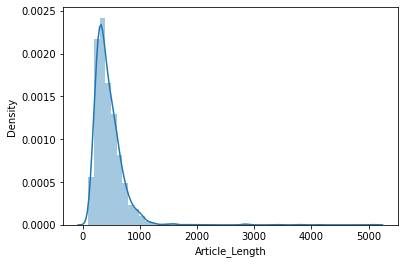

In [125]:
sns.distplot(full_df['Article_Length'])

In [127]:
full_df['Article_Length'].describe()

count    2225.000000
mean      452.995955
std       276.517327
min       100.000000
25%       291.000000
50%       392.000000
75%       552.000000
max      5065.000000
Name: Article_Length, dtype: float64

##### Distribution Plot for Summary Length as well as Statistical Measures

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


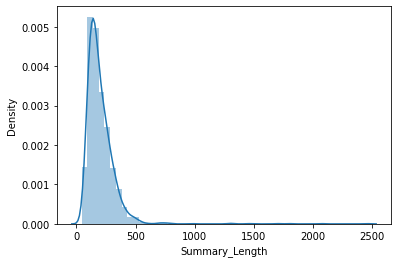

In [126]:
sns.distplot(full_df['Summary_Length'])

In [128]:
full_df['Summary_Length'].describe()

count    2225.000000
mean      200.920899
std       130.091529
min        44.000000
25%       127.000000
50%       173.000000
75%       244.000000
max      2451.000000
Name: Summary_Length, dtype: float64

### Text Preprocessing

In [92]:
contraction_dict = {"ain't": "is not", " aint ": "is not", "aren't": "are not", " arent ": "are not", " cant ": " cannot ", "can't": "cannot",
                    "'cause": "because", "could've": "could have", "couldn't": "could not", "couldnt": "could not", "didn't": "did not",
                    "didnt": "did not", " dint ": "did not", "doesn't": "does not", "doesnt": "does not", "don't": "do not", " dont ": " do not ", "hadn't": "had not",
                    "hadnt": "had not", "hasn't": "has not", "hasnt": "has not", "havent": "have not", "haven't": "have not", 
                    "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", 
                    "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                    "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us",
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
                    "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
                    "shan't": "shall not", "sha'n't": "shall not","shant": "shall not", "shan't've": "shall not have", "she'd": "she would",
                    "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                    "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                    "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
                    "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
                    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've":
                    "we have", "weren't": "were not", "werent": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                    "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                    "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                    "won't": "will not", "wont": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                    "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                    "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have",
                    " ie ": "that is", "i.e.": "that is", "Cc": "Carbon copy", " cc ": " carbon copy ", 
                    "TOR": "Terms of Reference", 'eg.': 'example', 'MoU': 'Memorandum of Understanding', 'MoUs': 'Memorandums of Understanding',
                    'MoM': 'Manufacturing Operations Management', "It's": "It is", "m / h": "metres per hour"
                    # 'ime': 'ime', 'ites': 'ites', 'ile': 'ile', 'ide': 'ide', 'ime!': 'ime!', 'ise': 'ise', 'ike': 'ike', 'ife': 'ife',
                    # 'ine.': 'ine.', 'ite': 'ite', 'ines': 'ines', 'iced': 'iced', 'ine': 'ine', 'ive ': 'ive ', 'ime ': 'ime', 'ile ': 'ile',
                    # 'ide ': 'ide', 'ise ': 'ise ', 'ive-':'ive-', 'ives': 'ives', 'ike ': 'ike ', 'ife ': 'ife ', 'ite ': 'ite ', 'ine ': 'ine ',
                    # 'idea': 'idea', 'imes': 'imes', 'ide.': 'ide.', 'ite,': 'ite,', 'ice ': 'ice ', 'iden': 'iden', 'ice,': 'ice,', 'ise,': 'ise,',
                    # 'inen'
                    }

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        if match.group(0) not in contractions.keys():
            return match.group(0)
        else:
            return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling',
                'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2',
                'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What',
                'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much',
                'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does',
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis',
                'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018',
                'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp',
                'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization',
                'beklieve': 'believe', 'e-mail': 'email', 'p2p': 'peer to peer', 'up-to': 'upto', 'revenue-driven': 'revenue-driven',
                'decision-makers': 'decision makers', 'Tvs': 'TVs', 'elswhere': 'elsewhere', 'traanslate': 'translate', 'oeder': 'order',
                'up-to-date': 'up to date', 'win win': 'win-win', 'in-charge': 'in charge', 'invoincing': 'invoicing', 'discus': 'discuss',
                'oraganize': 'organize', 'standsards': 'standards', 'Assuarance': 'Assurance','enterpreneural': 'enterpreneurial',
                'Geo-politics': 'Geopolitics', 'estblish': 'establish', 'tought': 'taught', 'proffesionally': 'professionally',
                'breifings': 'briefings', 'uodated': 'updated', 'hanlde': 'handle', 'tought': 'taught', 'instalment': 'installment',
                'indepth': 'in depth', 'compamy': 'company', 'learge': 'large', 'aperson': 'a person', 'a pproach': 'approach',
                'bein': 'being', ' eg ': ' eg. ', 'asses': 'assess', ' nee ': ' new ', 'organiszed': 'organized', 'inorder': 'in order', 
                'Incase': 'In case', 're-usable': 'reusable', 'eductae':'educate', 'begining': 'beginning', 'reserach': 'research',
                'indentify': 'identify', 'belef': 'belief', 'persistant': 'persistent', 'intouch': 'in touch', 'negotaite': 'negotiate',
                'relaevant': 'relevant', 'hnest': 'honest', 'up-todate': 'up to date', 'stafd': 'staff', 'tabke': 'table', 
                'aforeign': 'a foreign', 'organizagion': 'organisation', 'realible': 'reliable', 'Cordination': 'Coordination', 
                'seam,ess': 'seamless', 'neccesary': 'necessary', ' yo ': 'you', 'logistica': 'logistics', 'sanitzation': 'sanitization',
                'organse': 'organise', 'aftter': 'after', 'traning': 'training', 'successfull': 'successful', 'consignmet': 'consignment',
                'intrdue': 'introduce', 'prodcut': 'product', 'knwlegde': 'knowledge', 'roganizational': 'organisational', 'co-ordinate': 'coordinate',
                'organizing': 'organising', 'diffrent': 'different', 'businnes': 'business', 'buisness': 'business', 'ecuses': 'excuses', 'financinal': 'financial',
                'objecives': 'objectives', 'succesful': 'successful', 'fertilixzers': 'fertilizers', 'trianing': 'training',
                'updatea': 'updated', 'someof': 'some of', 'boarder': 'border', 'deliveires': 'deliveries', 'exsisting': 'existing',
                'elaviating': 'alleviating', 'excell': 'excel', 'goole': 'google', 'feedbackj': 'feedback', 'occasionaly': 'occassionally',
                'parametres': 'parameters', 'sahre': 'share', 'aslo': 'also', 'emmediately': 'immediately', 'emmediate': 'immediate',
                'prouect': 'product', 'quicke': 'quicker', 'termininal': 'terminal', 'aquick': 'a quick', 'conviencing': 'convincing',
                'convience': 'convince', 'skillsi': 'skills', 'cordinated': 'coordinated', 'contriited': 'contributed', 'feilds': 'fields',
                ' di ': 'did', 'incase': 'in case', 'bt': 'but', 'recollocet': 'reallocate', 'hoime': 'home', ' agri ': 'agriculture',
                'studdies': 'studies', 'troble': 'trouble', 'govrmnet': 'government', 'referencde': 'referenced', 'approva': 'approval',
                'Iwas': 'I was', 'startegic': 'strategic', 'suppprting': 'supporting', 'assosiation': 'association', 'thier': 'their', 
                ' inkind ': ' in kind ', 'discusss': 'discuss'}

def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

mispellings, mispellings_re = _get_mispell(mispell_dict)

def replace_typical_misspell(text):
    def replace(match):
        if match.group(0) not in mispellings.keys():
            return match.group(0)
        else:
            return mispellings[match.group(0)]
    return mispellings_re.sub(replace, text)

def replace_utf8_encodings(free_text):
    ft = re.sub(r'â€™', "'", free_text)
    ft = re.sub(r'â€“', "-", ft)
    ft = re.sub(r'â€˜', "'", ft)
    ft = re.sub(r'â€¦', "…", ft)
    ft = re.sub(r'â€œ', '“', ft)
    ft = re.sub(r'Â£', '£', ft)
    ft = re.sub(r'â€¢', '-', ft)
    return ft    

# sc = SpellChecker()
# def replace_other_misspells(text):
#     tokens = wordpunct_tokenize(text)
#     # Possibly prevent NEs from being judged as wrongly spelled
#     needed_tokens = [token for token in tokens if not token[0].isupper() and token not in string.punctuation]
#     print(needed_tokens)
#     misspelled = sc.unknown(needed_tokens)
#     print(misspelled)
#     if misspelled != set():
#         for token in misspelled:
#             correct = sc.correction(token)
#             print(correct)
#             try:
#                 text = re.sub(token, correct, text)
#             except: pass
#     return text

def preprocess_text(free_text):
    # remove non-word characters    
    ft = free_text.strip()
    ft = re.sub('\x01', '', ft)
    ft = re.sub('\xa0', '', ft)
    ft = replace_utf8_encodings(ft)
    ft = re.sub(r'\n{2}', '.', ft)
    if bool(re.search(r'[@â€�™Âœ“ï§¬ž¢¶±ª–ƒÃ˜Ë„ðŸ˜ãƒ»†ðŒï˜]', ft)):
        ft = re.sub(r'[@â€�™Âœ“ï§¬ž¢¶±ª–ƒÃ˜Ë„ðŸ˜ãƒ»†ðŒï˜]', '', ft)
    ft = re.sub(r'\s\.{2,6}(\s|$)', ' ', ft)
    ft = re.sub(r"([a-zA-Z])([\.,/:;!?])", r'\1 \2', ft)
    ft = re.sub(r"(['])(\.)", r"\1 \2", ft)
    ft = re.sub(r"(\.)(['])", r"\1 \2", ft)
    ft = re.sub(r'(["])(\.)', r"\1 \2", ft)
    ft = re.sub(r'(\.)(["])', r"\1 \2", ft)
    ft = re.sub(r'([\.,/:;!?])([a-zA-Z])', r'\1 \2', ft)
    ft = re.sub(r'(\d)([a-zA-Z])', r'\1 \2', ft)
    ft = re.sub(r'(\w)(,)(\w)', r'\1 \2 \3', ft)
    # get rid of 2 or more 
    ft = re.sub(r'\s\.{2,}\s', ' ', ft)
    ft = re.sub(r'([a-zA-Z0-9#])(!)', r'\1 \2', ft)
    ft = replace_contractions(ft)
    ft = replace_typical_misspell(ft)
    # ft = replace_other_misspells(ft)
    if bool(re.search(r'\d', ft)):
        ft = re.sub(r'([0-9]+)(\.)', r'\1', ft)
        ft = re.sub(r'([0-9]+)(\))', r'\1', ft)
        # x = re.sub('$[0-9]+(\.)', '\1 \2', ft)
        # x = re.sub('$[0-9]+(\))', '\1 \2', ft)
        ft = re.sub('[0-9]{5,}', '#####', ft)
        ft = re.sub('[0-9]{4}', '####', ft)
        ft = re.sub('[0-9]{3}', '###', ft)
        ft = re.sub('[0-9]{2}', '##', ft)
    return ft


#### Test the Text Preprocessing Module

In [93]:
df_train['Article'].values[2]

'Hitachi unveils \'fastest robot\'\n\nJapanese electronics firm Hitachi has unveiled its first humanoid robot, called Emiew, to challenge Honda\'s Asimo and Sony\'s Qrio robots.\n\nHitachi said the 1.3m (4.2ft) Emiew was the world\'s quickest-moving robot yet. Two wheel-based Emiews, Pal and Chum, introduced themselves to reporters at a press conference in Japan. The robots will be guests at the World Expo later this month. Sony and Honda have both built sophisticated robots to show off developments in electronics. Explaining why Hitachi\'s Emiew used wheels instead of feet, Toshihiko Horiuchi, from Hitachi\'s Mechanical Engineering Research Laboratory, said: "We aimed to create a robot that could live and co-exist with people." "We want to make the robots useful for people ... If the robots moved slower than people, users would be frustrated." Emiew - Excellent Mobility and Interactive Existence as Workmate - can move at 3.7m/h. Its "wheel feet" resemble the bottom half of a Segway sc

In [94]:
print(df_train['Article'].values[2])

Hitachi unveils 'fastest robot'

Japanese electronics firm Hitachi has unveiled its first humanoid robot, called Emiew, to challenge Honda's Asimo and Sony's Qrio robots.

Hitachi said the 1.3m (4.2ft) Emiew was the world's quickest-moving robot yet. Two wheel-based Emiews, Pal and Chum, introduced themselves to reporters at a press conference in Japan. The robots will be guests at the World Expo later this month. Sony and Honda have both built sophisticated robots to show off developments in electronics. Explaining why Hitachi's Emiew used wheels instead of feet, Toshihiko Horiuchi, from Hitachi's Mechanical Engineering Research Laboratory, said: "We aimed to create a robot that could live and co-exist with people." "We want to make the robots useful for people ... If the robots moved slower than people, users would be frustrated." Emiew - Excellent Mobility and Interactive Existence as Workmate - can move at 3.7m/h. Its "wheel feet" resemble the bottom half of a Segway scooter. With 

In [95]:
preprocess_text(df_train['Article'].values[2])

'Hitachi unveils \'fastest robot\' . Japanese electronics firm Hitachi has unveiled its first humanoid robot , called Emiew , to challenge Honda\'s Asimo and Sony\'s Qrio robots Hitachi said the ## m (## ft) Emiew was the world\'s quickerst-moving robot yet . Two wheel-based Emiews , Pal and Chum , introduced themselves to reporters at a press conference in Japan . The robots will be guests at the World Expo later this month . Sony and Honda have both built sophisticated robots to show off developments in electronics . Explaining why Hitachi\'s Emiew used wheels instead of feet , Toshihiko Horiuchi , from Hitachi\'s Mechanical Engineering Research Laboratory , said : "We aimed to create a robot that could live and co-exist with people . " "We want to make the robots useful for people If the robots moved slower than people , users would be frustrated . " Emiew - Excellent Mobility and Interactive Existence as Workmate - can move at ## metres per hour . Its "wheel feet" resemble the bott

In [96]:
print(preprocess_text(df_train['Article'].values[2]))

Hitachi unveils 'fastest robot' . Japanese electronics firm Hitachi has unveiled its first humanoid robot , called Emiew , to challenge Honda's Asimo and Sony's Qrio robots Hitachi said the ## m (## ft) Emiew was the world's quickerst-moving robot yet . Two wheel-based Emiews , Pal and Chum , introduced themselves to reporters at a press conference in Japan . The robots will be guests at the World Expo later this month . Sony and Honda have both built sophisticated robots to show off developments in electronics . Explaining why Hitachi's Emiew used wheels instead of feet , Toshihiko Horiuchi , from Hitachi's Mechanical Engineering Research Laboratory , said : "We aimed to create a robot that could live and co-exist with people . " "We want to make the robots useful for people If the robots moved slower than people , users would be frustrated . " Emiew - Excellent Mobility and Interactive Existence as Workmate - can move at ## metres per hour . Its "wheel feet" resemble the bottom half 

In [97]:
df_train['preprocessed_articles'] = df_train['Article'].progress_apply(preprocess_text)
df_train['preprocessed_summaries'] = df_train['Summary'].progress_apply(preprocess_text)
df_val['preprocessed_articles'] = df_val['Article'].progress_apply(preprocess_text)
df_val['preprocessed_summaries'] = df_val['Summary'].progress_apply(preprocess_text)

100%|██████████| 502/502 [00:00<00:00, 775.98it/s]


### Declare and Initialize a Keras Tokenizer Object 

In [98]:
tk = Tokenizer(filters = '')
tk.fit_on_texts(df_train['preprocessed_articles'].tolist() + df_train['preprocessed_summaries'].tolist() +
                df_val['preprocessed_articles'].tolist() + df_val['preprocessed_summaries'].tolist())

### Extract GLoVe Embeddings

In [86]:
embed_size = 300
embedding_path = 'drive/My Drive/Colab Notebooks/glove.840B.300d.txt'

In [80]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')
    
# return word and its corresponding 300 dimensional vector as a dictionary
embedding_index = dict(get_coefs(*o.split(" ")) for o in open(embedding_path, encoding='utf-8', errors='ignore'))

In [81]:
# Create a 2D numpy array of dimensions 840B x 300D using only the vector values of words 
all_embs = np.stack(embedding_index.values())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [82]:
# Extract mean and standard deviation of vector values to be used for replacing missing values
emb_mean,emb_std = all_embs.mean(), all_embs.std()

In [99]:
# Create vocabulary using tokenizer's assigned indices to words
word_index = tk.word_index

In [ ]:
word_index

In [101]:
# Decide the maximum number of words to be used from the vocabulary
nb_words = len(word_index)
nb_words

38596

In [102]:
# generate a 2D matrix that comprises of values from a normal random distribution generated using Mean and Standard Deviation of the vector values
# obtained from a previous step.
# We can also initialize the entire matrix with zero values
# Matrix Dimensions = (Max Features + 1) words x 300 Dimensions
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words + 1, embed_size))

In [103]:
# Replace the row with index 'i' of the mebedding matrix with the vector of the word assigned value 'i' in the word index
for word, i in word_index.items():
    try:
        embedding_vector = embedding_index.get(word)
        embedding_matrix[i] = embedding_vector
    except: pass

In [104]:
embedding_matrix.shape

(38597, 300)